<a href="https://colab.research.google.com/github/davidmorrison-08-30/Linear-Regression-with-Gradien-Descent-from-scratch/blob/main/GD_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PREPARATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from google.colab import drive

In [2]:
np.random.seed()

In [3]:
def gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray):
  difference = np.dot(X, w) - y
  return np.dot(X.T, difference)

In [4]:
class GDLinearRegression:
  def __init__(self, lr):
    self.lr = lr
    self.w = None
  def predict(self, X: np.ndarray):
    return np.dot(X, self.w) 
  def fit(self, X, y):
    self.w = np.random.randint(low=500, high=1000, size=(X.shape[1], 1))
    self.w = self.w.astype(float)
    for iter in range(10000):
      grad = gradient(X, y, self.w)
      self.w = self.w - grad*self.lr

In [5]:
def r2_score(y_pred, y):
  RSS = TSS = 0
  for i in range(len(y)):
    RSS += (y[i]-y_pred[i])**2
  mean_y = np.mean(y)
  for i in range(len(y)):
    TSS += (y[i]-mean_y)**2
  return 1 - (RSS/TSS)[0]

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## DATA PREPROCESSING

In [7]:
# read data
df = pd.read_csv("gdrive/My Drive/nyse.csv")

In [8]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-01-30,15962.580078,15974.400391,15813.230469,15818.900391,15818.900391,3802000000
246,2023-01-31,15818.900391,16036.990234,15809.660156,16036.389648,16036.389648,4679320000
247,2023-02-01,16036.389648,16222.200195,15871.070313,16121.250000,16121.250000,4856930000
248,2023-02-02,16121.250000,16178.559570,16035.540039,16122.580078,16122.580078,5624360000
249,2023-02-03,16122.580078,16122.580078,15953.480469,15999.400391,15999.400391,4694510000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,15352.567926,15473.968203,15215.068418,15349.357813,15349.357813,4.564074e+09
std,833.410415,815.179698,837.747317,829.914119,829.914119,8.811647e+08
min,13472.179688,13647.419922,13278.559570,13472.179688,13472.179688,1.706460e+09
25%,14781.529785,14891.664795,14638.324951,14781.529785,14781.529785,4.038288e+09
50%,15333.295410,15446.344727,15237.790039,15333.305176,15333.305176,4.416375e+09
75%,15887.842041,15986.774658,15745.104736,15887.842041,15887.842041,4.896660e+09
max,17069.660156,17160.330078,16858.710938,17069.660156,17069.660156,8.520740e+09


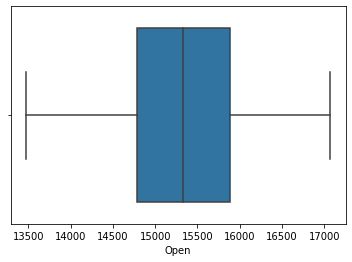

In [11]:
sns.boxplot(x=df["Open"])

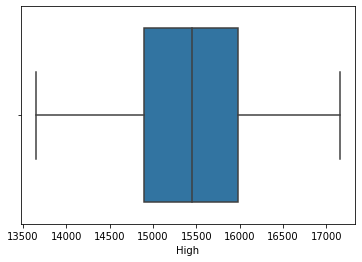

In [12]:
sns.boxplot(x=df["High"])

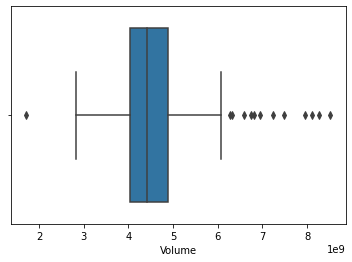

In [13]:
sns.boxplot(x=df["Volume"])

In [14]:
df = df.iloc[:, 1:]
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,16701.580078,16826.710938,16684.900391,16722.759766,16722.759766,4228480000
1,16722.759766,16880.330078,16685.230469,16853.710938,16853.710938,4459620000
2,16853.710938,17083.359375,16853.710938,17069.660156,17069.660156,4524350000
3,17069.660156,17160.330078,16790.759766,16855.960938,16855.960938,5314860000
4,16855.960938,16969.650391,16600.289063,16664.990234,16664.990234,5251500000


## DATA UNDERSTANDING

In [15]:
matrix = df.corr()
matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.989771,0.986971,0.971315,0.971315,0.025168
High,0.989771,1.000000,0.991153,0.988911,0.988911,0.051262
Low,0.986971,0.991153,1.000000,0.990703,0.990703,-0.010082
Close,0.971315,0.988911,0.990703,1.000000,1.000000,0.022063
Adj Close,0.971315,0.988911,0.990703,1.000000,1.000000,0.022063
Volume,0.025168,0.051262,-0.010082,0.022063,0.022063,1.000000


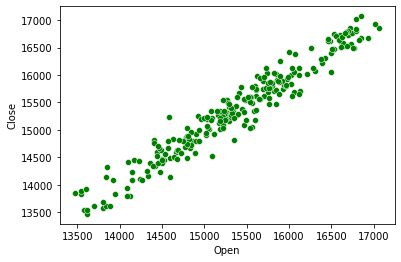

In [16]:
sns.scatterplot(data=df, x="Open", y="Close", color="green")

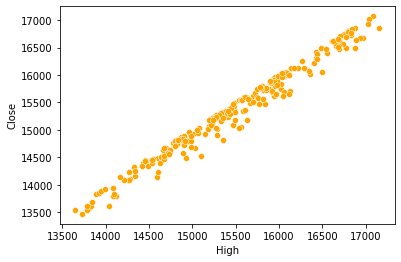

In [17]:
sns.scatterplot(data=df, x="High", y="Close", color="orange")

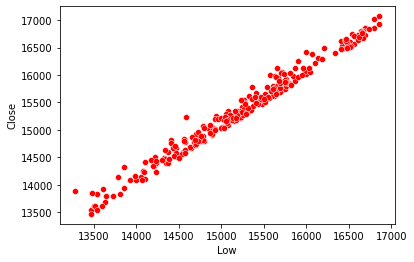

In [18]:
sns.scatterplot(data=df, x="Low", y="Close", color="red")

In [19]:
X = df.loc[:, ["Open", "High", "Low"]]
y = df["Close"]

In [20]:
X = X.to_numpy()
y = y.to_numpy()

In [21]:
y = y.reshape((250,1))
y.shape

(250, 1)

In [22]:
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

## DATA SCALING

In [23]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [24]:
y = std_scaler.fit_transform(y)

## TRAINING & EVALUATION

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = GDLinearRegression(lr=0.001)

In [27]:
model.fit(X_train, y_train)

In [28]:
print(model.w)

[[ 8.39000000e+02]
 [-5.87297167e-01]
 [ 7.72820311e-01]
 [ 8.01070935e-01]]


**Close = 897 - 0.5873 x Open + 0.7728 x High + 0.801 x Low**

supposed that the data is already scaled

In [29]:
y_train_pred = model.predict(X_train)
r2_score(y_train_pred, y_train)

0.9905296849287525

In [30]:
y_test_pred = model.predict(X_test)
r2_score(y_test_pred, y_test)

0.992374941777455

## VISUALIZATION ON TESTING DATA

In [31]:
data = np.zeros(shape=(y_test.shape[0]+y_test_pred.shape[0], 2))
for i in range(len(y_test)):
  data[i][0] = y_test[i]
  data[i][1] = 0                          # 0 ~ ACTUAL VALUE
for i in range(len(y_test_pred)):
  data[i+len(y_test)][0] = y_test_pred[i]
  data[i+len(y_test)][1] = 1              # 1 ~ PREDICTED VALUE

In [32]:
data = np.concatenate((np.ones(shape=(data.shape[0], 1)), data), axis=1)

In [33]:
data.shape 

(100, 3)

In [34]:
data = pd.DataFrame(data, columns=("y", "x", "actual or prediction"))
data.head(5)

,y,x,actual or prediction
0,1.0,-0.661776,0.0
1,1.0,1.686046,0.0
2,1.0,-0.823466,0.0
3,1.0,0.929973,0.0
4,1.0,-0.689268,0.0


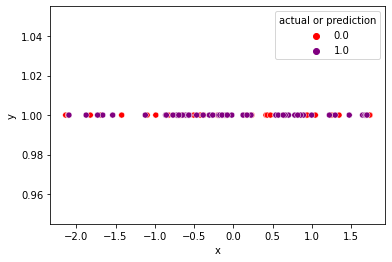

In [35]:
colors = {0: "red", 1: "purple"}
sns.scatterplot(data=data, x="x", y="y", hue="actual or prediction", palette=colors)